<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><h1>

# This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [3]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[3].shape

(28, 28)

In [6]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

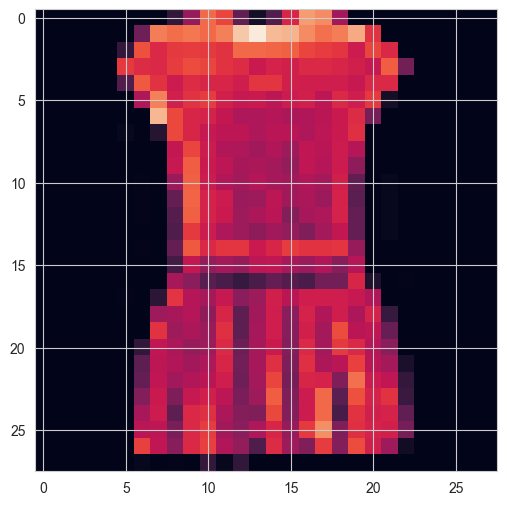

In [7]:
plt.imshow(X_train[3])
# plt.matshow(X_train[5])

In [8]:
Y_train.shape

(60000,)

In [9]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
np.unique(Y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [11]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [12]:
Y_train[3]

3

In [13]:
classes[int(Y_train[3])]

'Dress'

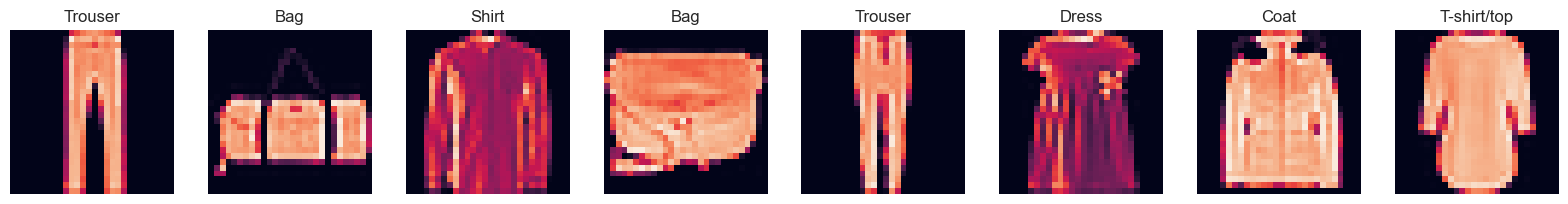

In [14]:
plt.figure(figsize=(20, 20))
for i in range(8):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(Y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [15]:
X_train[3].min()

0

In [16]:
X_train[3].max()

255

In [17]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [18]:
X_train[3].min()

0.0

In [19]:
X_train[3].max()

1.0

In [20]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [21]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
Y_train.shape

(60000,)

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(Y_train, 10) 
Y_test = to_categorical(Y_test, 10)
Y_train.shape

(60000, 10)

In [27]:
Y_train[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
Y_train[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-11 13:46:11.958608: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-11 13:46:11.958904: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 32)       128       
 hNormalization)                                                 
                                                        

In [32]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test)) 

Epoch 1/10


2022-10-11 13:46:12.355419: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-11 13:46:12.778166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.5045 - accuracy: 0.8209

2022-10-11 13:46:33.312351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 23s 11ms/step - loss: 0.5044 - accuracy: 0.8210 - val_loss: 0.3494 - val_accuracy: 0.8696
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3401 - accuracy: 0.8765 - val_loss: 0.3298 - val_accuracy: 0.8809
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2965 - accuracy: 0.8932 - val_loss: 0.2859 - val_accuracy: 0.8932
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2724 - accuracy: 0.9014 - val_loss: 0.2943 - val_accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2495 - accuracy: 0.9088 - val_loss: 0.2760 - val_accuracy: 0.9013
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2372 - accuracy: 0.9130 - val_loss: 0.3075 - val_accuracy: 0.8859
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2239 - accuracy: 0.9173 - val_loss: 0.2623 - val_accura

In [33]:
model.metrics_names

['loss', 'accuracy']

## Model Evaluation

In [34]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.504,0.821,0.349,0.870
1,0.340,0.877,0.330,0.881
2,0.297,0.893,0.286,0.893
3,0.272,0.901,0.294,0.886
4,0.249,0.909,0.276,0.901
5,0.237,0.913,0.308,0.886
6,0.224,0.917,0.262,0.903


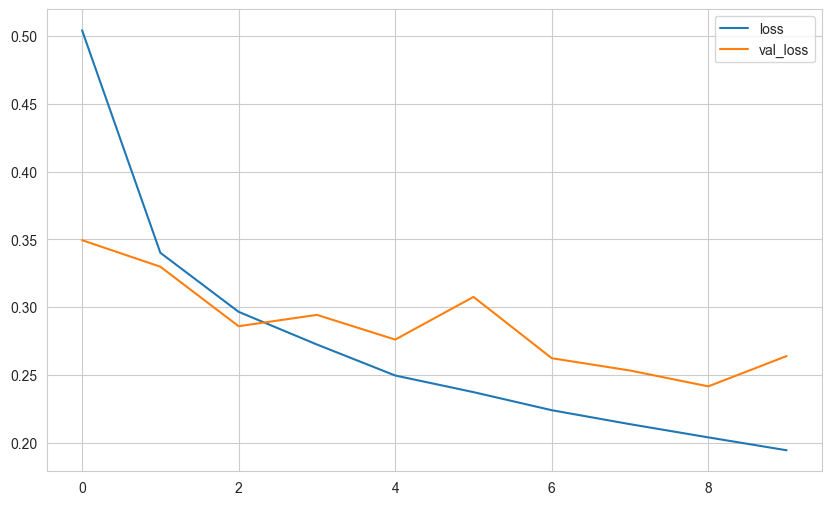

In [35]:
summary[["loss", "val_loss"]].plot();

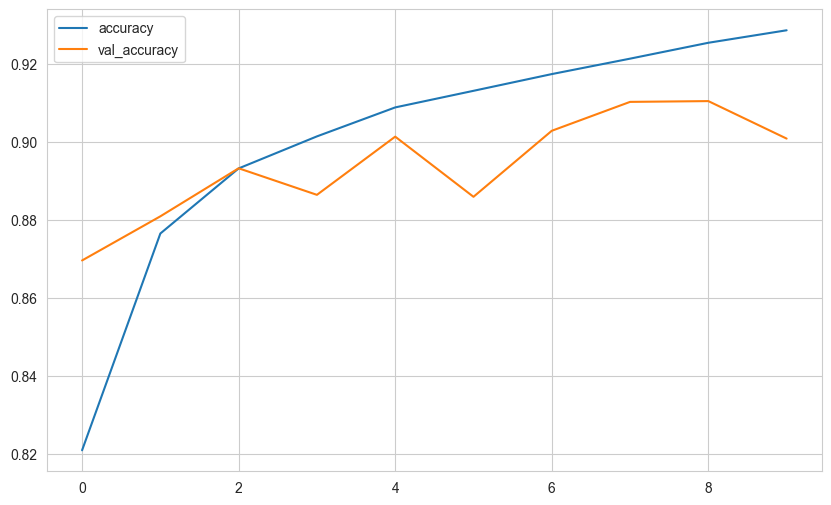

In [36]:
summary[["accuracy", "val_accuracy"]].plot();

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2639 - accuracy: 0.9008


[0.2638574540615082, 0.9008000493049622]

In [39]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2638574540615082
Test accuracy: 0.9008000493049622


## Fixing Overfitting

In [40]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 28)        7084      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 18928)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights = True)

In [44]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
   1/1875 [..............................] - ETA: 11:17 - loss: 2.2935 - accuracy: 0.0312

2022-10-11 13:49:45.613996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 0.3600 - accuracy: 0.8690

2022-10-11 13:50:05.833941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 22s 12ms/step - loss: 0.3598 - accuracy: 0.8690 - val_loss: 0.2870 - val_accuracy: 0.8970
Epoch 2/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2336 - accuracy: 0.9133 - val_loss: 0.2597 - val_accuracy: 0.9050
Epoch 3/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1866 - accuracy: 0.9307 - val_loss: 0.2526 - val_accuracy: 0.9115
Epoch 4/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1485 - accuracy: 0.9454 - val_loss: 0.2748 - val_accuracy: 0.9114
Epoch 5/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1220 - accuracy: 0.9544 - val_loss: 0.2472 - val_accuracy: 0.9180
Epoch 6/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0930 - accuracy: 0.9646 - val_loss: 0.2564 - val_accuracy: 0.9229
Epoch 7/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0711 - accuracy: 0.9737 - val_loss: 0.2970 - val_accura

In [45]:
model.metrics_names

['loss', 'accuracy']

## Model Evaluation

In [46]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.360,0.869,0.287,0.897
1,0.234,0.913,0.260,0.905
2,0.187,0.931,0.253,0.912
3,0.149,0.945,0.275,0.911
4,0.122,0.954,0.247,0.918
5,0.093,0.965,0.256,0.923
6,0.071,0.974,0.297,0.922


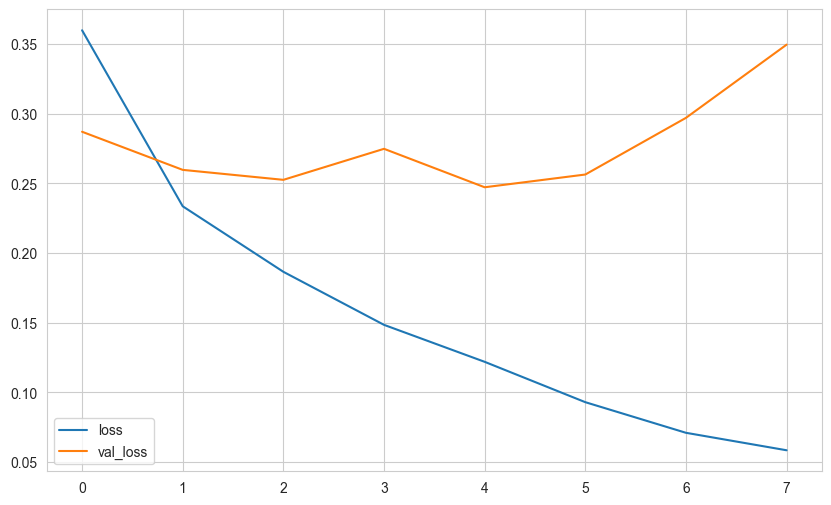

In [47]:
summary[["loss", "val_loss"]].plot();

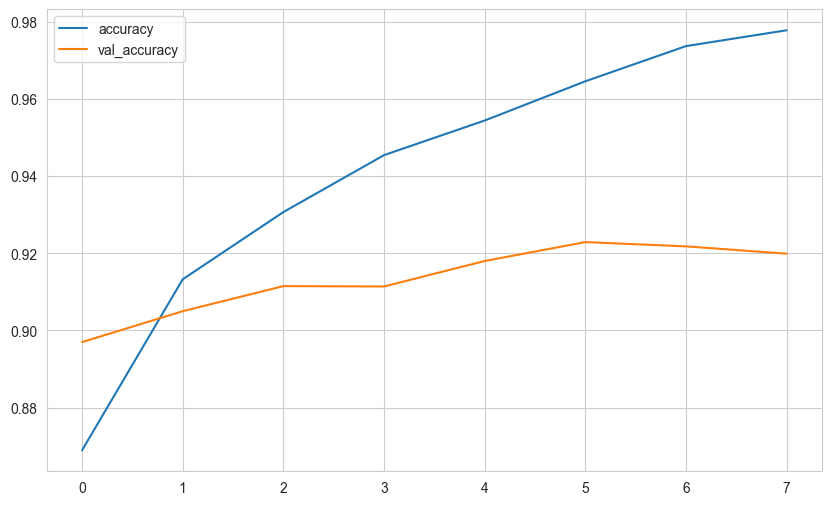

In [48]:
summary[["accuracy", "val_accuracy"]].plot();

In [49]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2563675343990326
Test accuracy: 0.9229000210762024


## Prediction

In [50]:
pred_prob = model.predict(X_test)
pred_prob

 54/313 [====>.........................] - ETA: 0s

2022-10-11 13:52:44.227095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


array([[1.6091783e-09, 3.0231870e-08, 3.0014625e-08, ..., 1.6030839e-05,
        3.0592567e-08, 9.9998319e-01],
       [1.3207231e-06, 9.6650729e-11, 9.9995279e-01, ..., 1.5024446e-09,
        1.3400618e-10, 2.3653024e-10],
       [5.3214446e-09, 9.9999988e-01, 1.9020427e-09, ..., 5.8423915e-14,
        7.8280098e-11, 1.3944083e-14],
       ...,
       [2.5051325e-10, 2.3428597e-15, 4.2124125e-12, ..., 8.7987896e-13,
        1.0000000e+00, 1.8150881e-14],
       [1.5598167e-09, 9.9999964e-01, 2.0929398e-09, ..., 9.9287995e-16,
        3.9697297e-14, 9.6294962e-16],
       [3.5411133e-05, 3.2747512e-06, 3.9784968e-06, ..., 1.5240210e-03,
        1.7327695e-04, 7.2815419e-06]], dtype=float32)

In [51]:
y_pred = np.argmax(pred_prob, axis=1)

In [52]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [53]:
y_pred.shape

(10000,)

In [54]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [55]:
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels[1]

2

In [56]:
print(classification_report(rounded_labels, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.88      0.88      0.88      1000
           3       0.92      0.94      0.93      1000
           4       0.86      0.88      0.87      1000
           5       0.99      0.98      0.99      1000
           6       0.76      0.79      0.78      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [57]:
print(confusion_matrix(rounded_labels, y_pred))

[[851   0  13   9   4   0 120   0   3   0]
 [  1 980   1  10   2   0   4   0   2   0]
 [ 22   1 878   7  41   0  50   0   1   0]
 [ 10   2   7 939  20   0  22   0   0   0]
 [  0   0  56  21 880   0  43   0   0   0]
 [  0   0   0   0   0 984   0  12   0   4]
 [ 64   0  44  26  72   0 790   0   4   0]
 [  0   0   0   0   0   3   0 978   0  19]
 [  6   0   0   4   3   1   5   1 980   0]
 [  0   0   0   0   0   5   0  25   1 969]]


<AxesSubplot: >

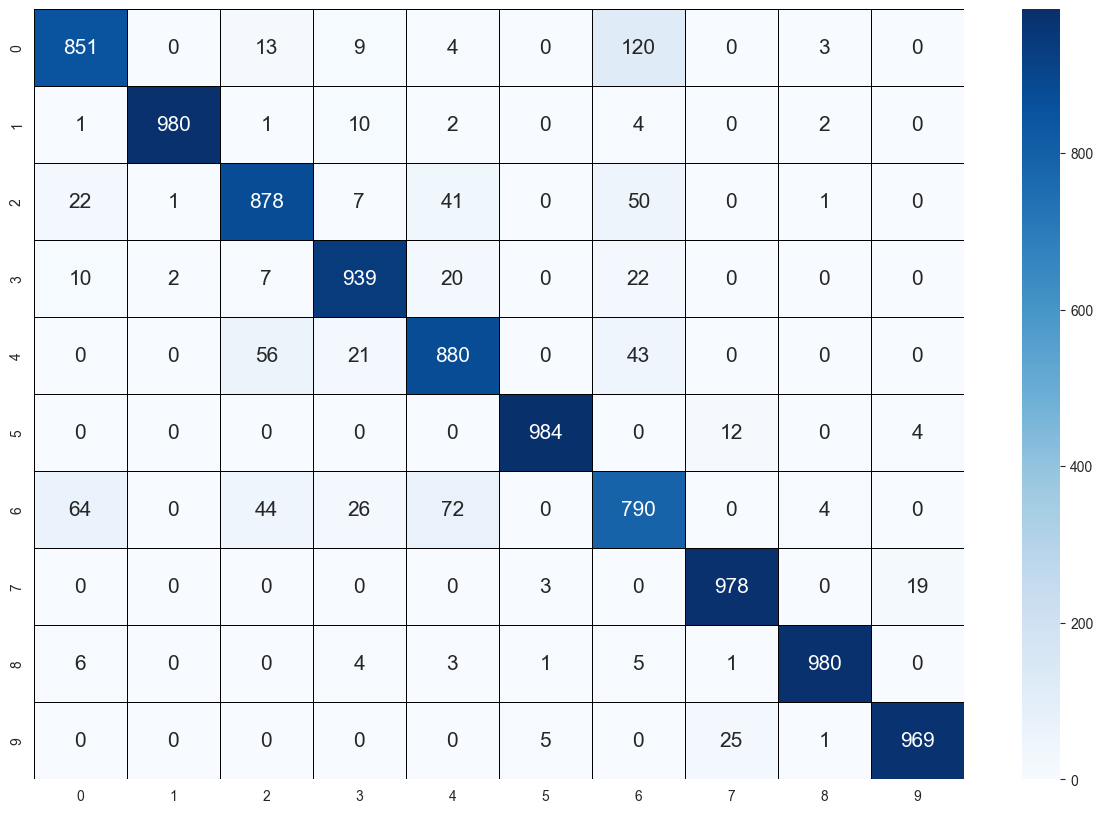

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(rounded_labels, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})